# **Project Name**    -  Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name - Balaji J** 

# **Project Summary -**

Airline Passenger Referral Prediction is a binary classification problem, need to predict wheather a passenger will refer or recommended their known people to a particular airline for travel.These dataset has almost all the datatypes.It includes numerical, categorical, text, and date data.We have different rating features and customer review to predict the target variable.I started by changing the date features from object to datetime datatype. I created two features from route which is visited_from and visit_to. After creating two features, I imputed missing value of different rating features, by finding the average value of that respective airline and replacing NaN with that. 

Then I found some columns with more Nan values which cannot be imputed. So I dropped that columns.And then, I need to handle some categorical features now, I one_hot_encoded the airline features and then I also did the same trick with the cabin features.Then I dropped the drown_date features. Then I have review data to handle, I made the entire review data to lowercase, then removed punctual, stopping words and extra white spaces.

I used the TfidVector to change the text data into  numerical,I chose 400 as the maximum features so each review observation will be converted into 400 length features.I tried three different models SVC, RandomForest and XGBoost for training. Among these RandomForest, XGBoost almost gave the better results with the default parameters. Using the hyperparameter tuning,doesn't make much difference.I chose SVM as the final model.I used the GridSearch's API for finding the features importances and plotted.


# **GitHub Link -**

https://github.com/balaji-89/Airline_Passenger_Referral_Prediction/tree/main/Solution

# **Problem Statement**


Airline Passenger Referral Prediction is a binary classification problem, need to predict wheather a passenger will refer or recommended their known people to a particular airline for travel.These dataset has almost all the datatypes.It includes numerical, categorical, text, and date data.We have different rating features and customer review to predict the target variable.I started by changing the date features from object to datetime datatype.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [36]:
# Import Libraries
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings
#text preprocessing libraries
import contractions
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



from nltk.stem import PorterStemmer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer


#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [37]:
# Load Dataset


def load_data(path):
    ''' 
    Description : It featches the csv data from the specified location 
                  and returns it as Dataframe object

    Parameters : 
      'path' - Holding path of the csv data located.
    '''
    return pd.read_excel(path)


#loading data
df = load_data('../Dataset/data_airline_reviews.xlsx')

### Dataset First View

In [38]:
# Dataset First Look
df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [39]:
# Dataset Rows & Columns count
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  131895
Total Columns:  17


### Dataset Information

In [40]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [41]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

70711

In [42]:
#Dropping the Empty rows
df.drop_duplicates(keep=False,inplace= True)
df.reset_index(inplace=True,drop=True)


In [43]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [44]:
# Missing Values/Null Values Count
df.isna().sum()

airline                0
overall             1634
author                 0
review_date            0
customer_review        0
aircraft           39333
traveller_type     21266
cabin               2314
route              21291
date_flown         21356
seat_comfort        4680
cabin_service       4656
food_bev           12347
entertainment      20156
ground_service     21611
value_for_money     1742
recommended         1339
dtype: int64

Text(0, 0.5, 'Total Number of NaN values')

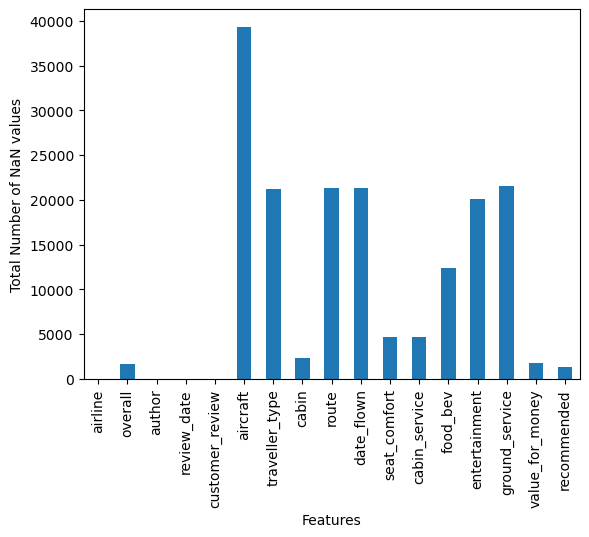

In [45]:
# Visualizing the missing values


df.isnull().sum().plot(kind= 'bar')
plt.xlabel('Features')
plt.ylabel("Total Number of NaN values")


### What did you know about your dataset?

Initially the data has some blank values in it so  I cleaned that. After we could there is totally 17 Features and more than 60K rows are presented in this dataset. Among 17 features, there are 7 float and 10 object datatype features. And finally the data set has more null values which has to be treated.

## ***2. Understanding Your Variables***

In [46]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [47]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,54957.000000,51911.000000,51935.000000,44244.000000,36435.000000,34980.000000,54849.000000
mean,5.182397,2.964728,3.208145,2.945823,2.913106,2.668439,2.956481
std,3.490985,1.431452,1.571200,1.484569,1.501375,1.615898,1.590068
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [48]:
#Categorical Dataset Describe
df.describe(exclude=float)

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
count,56591,56591,56591,56591,17258,35325,54277,35300,35235,55252
unique,75,41086,2990,56583,1980,4,4,23274,63,2
top,American Airlines,Anders Pedersen,14th January 2015,LHR-TUN return to LHR. Aircraft was A320 on bo...,A320,Solo Leisure,Economy Class,LHR to JFK,August 2015,no
freq,2825,90,153,2,2103,13072,41904,30,1050,28766


### Variables Description 

Airline : Has totally data of 75 unique airlines company name.
Author : One who wrote the review, there is 41086 unique author in our dataset.
review_date: A date type - The date of the review posted.
customer_review : It is text data,which is nothing but the passengers review
cabin : Its categorical feature, which has 4 different types like Business class, Economy class, etc..
route : From and to country.
recommended : Its our target variable, which consists of yes or no.
overall : Its is the overall rating given by the user ranges from 1 to 10.
There are other 6 rating features and each features ranges from 1 to 5.
There are : 
    seat_comfort, cabin_services, food etc...

### Check Unique Values for each variable.

In [49]:
# Check Unique Values for each variable.

#Calculaing unique values for most continous cols might not give any insight. Sometime I may want to display 
#unique values of only catgorical/object dtypes so I created function here.

def show_unique_of_dtype_cols(df,dtype):
	'''
	description : It gives the unique values of each columns with given dtype.
	parameters : 
    		df : Whole df from which you want to display unique values of cols.
            
    		dtype : 'object' - To get info of categorical cols
    				'number' - To get info of numberical cols
                    'int' - To get info of only integer col
                    'float' - To get info of only float col
	'''
	req_cols = df.select_dtypes(include = dtype)
	for col in req_cols:
		dat = df[col].value_counts()
		print("Feature Name ----- ",dat.name)
		print(dat)
		print('----------------------------------------')


        
        
        
        




In [50]:
#printing unique value of only object cols
show_unique_of_dtype_cols(df, 'object')

Feature Name -----  airline
American Airlines     2825
Spirit Airlines       2808
United Airlines       2719
British Airways       2651
Emirates              1740
                      ... 
QantasLink             103
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 75, dtype: int64
----------------------------------------
Feature Name -----  author
Anders Pedersen    90
Michel Perrin      84
Jonathan Rodden    81
T Eldem            54
John Curtain       52
                   ..
L Meeram            1
Arnaud Gregoire     1
Natasha Ritzer      1
Maciek Preyss       1
Kasper Hettinga     1
Name: author, Length: 41086, dtype: int64
----------------------------------------
Feature Name -----  review_date
14th January 2015     153
19th January 2015     145
4th March 2015        135
28th October 2014     132
18th February 2015    120
                     ... 
29th November 2010      1
25th December 2010      1
7t

In [51]:
#printing unique value of only numerical cols
show_unique_of_dtype_cols(df, 'number')

Feature Name -----  overall
1.0     14903
10.0     7528
9.0      6888
8.0      6215
2.0      5016
7.0      3852
3.0      3449
5.0      2669
6.0      2239
4.0      2198
Name: overall, dtype: int64
----------------------------------------
Feature Name -----  seat_comfort
1.0    12688
4.0    12561
3.0    10595
5.0     9017
2.0     7050
Name: seat_comfort, dtype: int64
----------------------------------------
Feature Name -----  cabin_service
5.0    16130
1.0    12542
4.0     9702
3.0     7493
2.0     6068
Name: cabin_service, dtype: int64
----------------------------------------
Feature Name -----  food_bev
1.0    11848
4.0     9688
5.0     8695
3.0     8234
2.0     5779
Name: food_bev, dtype: int64
----------------------------------------
Feature Name -----  entertainment
1.0    10534
4.0     7982
5.0     7034
3.0     6737
2.0     4148
Name: entertainment, dtype: int64
----------------------------------------
Feature Name -----  ground_service
1.0    14342
5.0     7147
4.0     6008
3.0  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [52]:
#printing first 4 data
df.head(4)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [53]:
#changing review_date feature into pandas datetime

def handle_review_date(date_review_values):
    fin_date = []
    for date in date_review_values:
        #extracting day
        day = date.split()[0]
        if len(day) == 3:
            day = int(day[:1])
        else: 
            day = int(day[:2])
        #extracting month
        month = date.split()[1]
        month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
        month =  month_map[month]
        #extracting year
        year = date.split()[-1]
        fin_date.append(f'{year}-{month}-{day}')
    #returning as datetime
    return pd.to_datetime(fin_date)
   


In [54]:

#changing date_flown feature into pandas datetime

def handle_date_flown(date_flown_values):
    fin_date = []
    for date in date_flown_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        
        else: 
            try:
                fin_date.append(pd.to_datetime(date))
            except:
                year = date.split()[1]
                month = date.split()[0]
                month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
                fin_date.append(pd.to_datetime(f'{year}-{month_map[month]}-01'))

    return fin_date
        




In [55]:
#creating two features as visit from and visit to from route feature

def handle_route():
    final_route = []
    for route in df.route.values:
        if pd.isna(route):
            final_route.append((np.nan,np.nan))
        else:
            to_ind = str(route).find(' to ')
            via_idx = str(route).find(' via ')
            if via_idx == -1:
                final_route.append((str(route)[:to_ind],str(route)[to_ind+3:]))
            else:
                final_route.append((str(route)[:to_ind],str(route)[to_ind+3:via_idx]))
    return final_route

In [56]:
df.date_flown =  handle_date_flown(df.date_flown)
df.review_date = handle_review_date(df.review_date)
df.route = handle_route()
df['visit_from'] = df.route.apply(lambda x: x[0])
df['visit_to'] = df.route.apply(lambda x : x[1])
df.drop('route',inplace= True,axis= 1)

In [57]:
#priting random 5 observation 
df.sample(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,visit_from,visit_to
52502,Aer Lingus,1.0,Thomas Fitzgerald,2018-09-04,"Not Verified | Terrible customer service, rude...",NaN,Solo Leisure,Economy Class,2018-07-01,3.0,3.0,NaN,NaN,3.0,1.0,no,Dublin,New York
56240,WOW air,1.0,Cristina Navarrete,2015-10-22,Deep disappointment with the service I receive...,NaN,Business,Economy Class,2015-10-01,3.0,4.0,1.0,NaN,1.0,2.0,no,Paris,Washington
47775,Vueling Airlines,10.0,O Connor,2013-10-15,This was my first flight on Vueling. Wonderful...,NaN,NaN,Economy Class,NaT,5.0,5.0,4.0,NaN,NaN,5.0,yes,NaN,NaN
35378,Etihad Airways,3.0,Teo Da Silva,2014-01-28,Have flown Etihad 4 times from LHR to BKK and ...,NaN,NaN,Economy Class,NaT,1.0,3.0,2.0,2.0,NaN,4.0,no,NaN,NaN
12616,United Airlines,8.0,Haylee Arnold,2019-03-29,âœ… Trip Verified | Rome to Newark. On our fli...,NaN,Solo Leisure,Economy Class,2019-03-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,Rome,Newark


### What all manipulations have you done and insights you found?

I don't need much manipulations to do for EDA. There is two date columns "date_flown" and "review_date", these data had stored as object as default so I changed these to panda's Datetime object so that we can use it for EDA much more effectively. And finally I splitted "route" features as two features as "visit_from" and "visit_to" and dropped "route".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

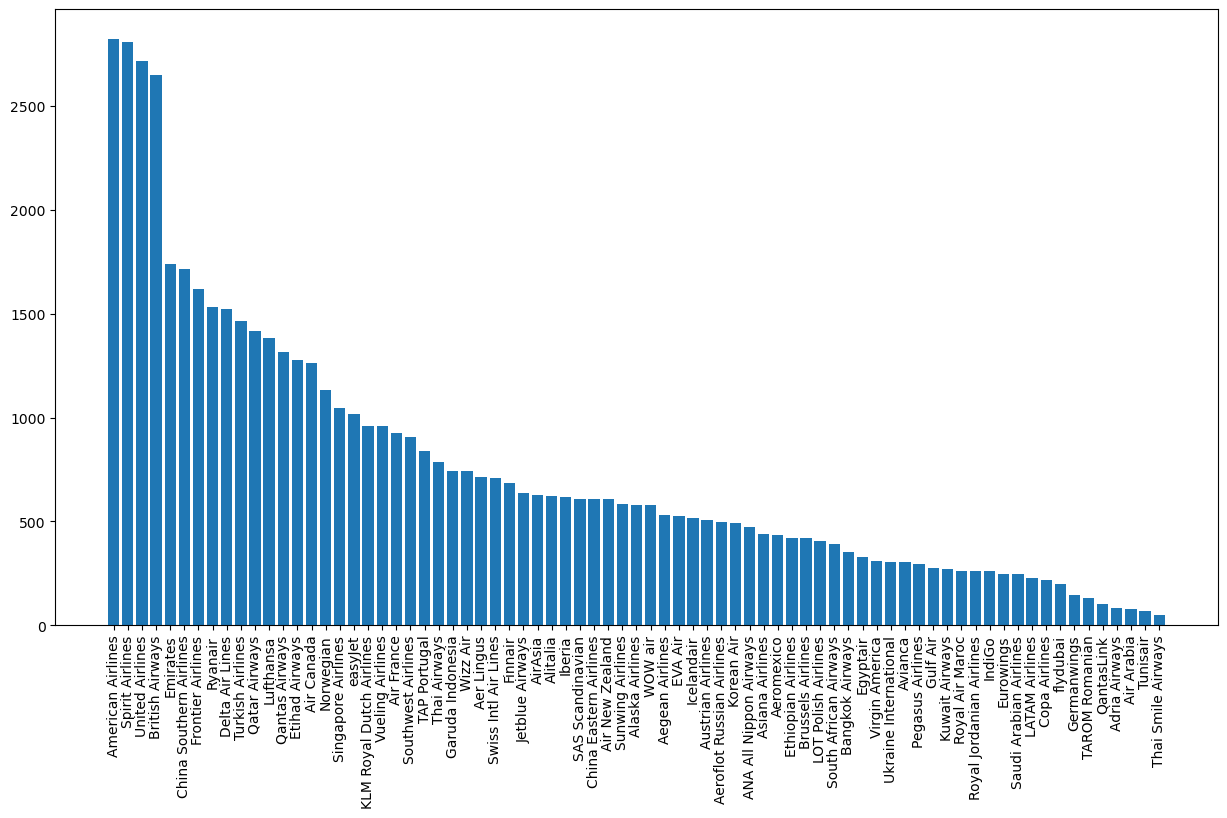

In [58]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
plt.bar(x = df.airline.value_counts().index,height=df.airline.value_counts().values)  
plt.xticks(rotation = 90)

plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart will help us to get the insights better if it is a categoryical one side and numerical(especially count) on other side. So I chose this chart.

##### 2. What is/are the insight(s) found from the chart?

We can able to see that most reviewed passengers are travelled in American Airlines,Spirit Airlines and United Airlines which is collectively more than 7800 reviews. And there are totally 75 unique airlines in our dataset. The lowest reviewed airlines "Thai Smile Airways".


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Top three airlines has more reviews,so may be those airlines are very popular among travellers and also may be the number of passengers using that airlines is high.

#### Chart - 2

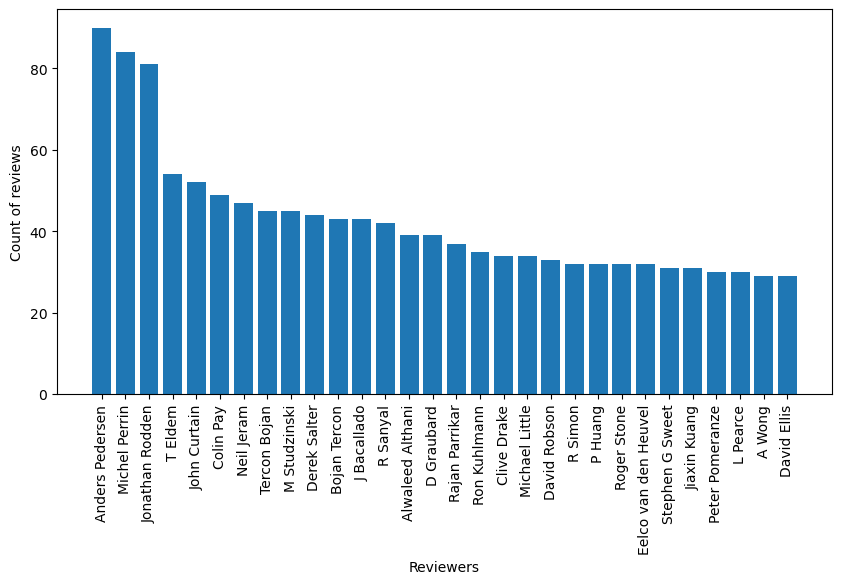

In [59]:
# Chart - 2 visualization code

plt.figure(figsize=(10,5))
plt.bar(x = df.author.value_counts().sort_values(ascending=False)[:30].index,height=df.author.value_counts().sort_values(ascending=False)[:30].values)  
plt.xticks(rotation = 90)
plt.ylabel("Count of reviews")
plt.xlabel("Reviewers")

plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart will help us to get the insights better if it is a categoryical one side and numerical(especially count) on other side. So I chose this chart.

##### 2. What is/are the insight(s) found from the chart?

The data shown above is the top 30 reviewers. we can see that Anders Pedersen reviewed almost 100 times and followed by Micheal Perrin who had reviewed almost 90.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These are the people who might using the airlines more, so their reviews needs more attention and we should try to satisfy those people. Which inturn helps us as good marketing.There good reviews about our airlines will makes more people to try our airlines.

#### Chart - 3

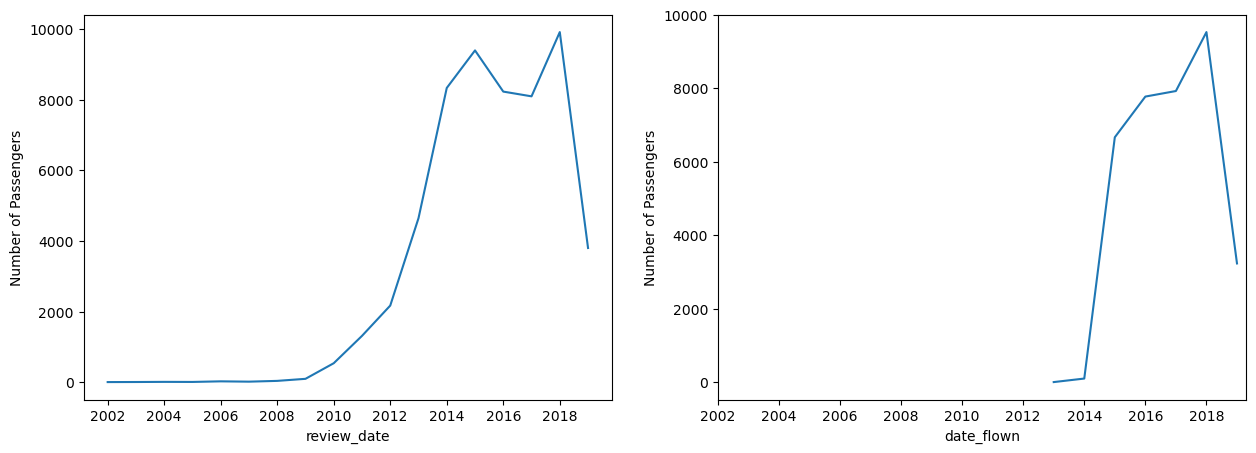

In [60]:
# Chart - 3 visualization code
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df.groupby(df.review_date.dt.year)['review_date'].count().plot(ylabel='Number of Passengers',xticks=range(2002,2020,2))

plt.subplot(1,2,2)
df.groupby(df.date_flown.dt.year)['date_flown'].count().plot(ylabel='Number of Passengers',xticks=range(2002,2020,2))
plt.show()

##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.

##### 2. What is/are the insight(s) found from the chart?

We could clearly see that "review_date" ranges from 2002 to 2019, and most number of passengers are reviewed on 2018. In the right, we have date of flown by passengers,as we expected there is peak in 2018. So this means on 2018 more people travelled in airlines and hence there is more reviews on 2018. There is another thing to note our "date_flown" has data from 2013 where as review date is starting from 2002.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are more capable people to use airlines but we could see there is drop after 2018.So this might be good time for individual company to attract the passengers.

#### Chart - 4

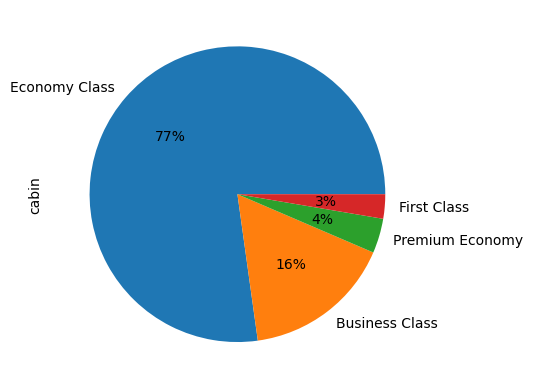

In [61]:
# Chart - 4 visualization code
df.cabin.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()


##### 1. Why did you pick the specific chart?

I chose pie chart because it will help us clearly notice the distribution of percentage over different category.

##### 2. What is/are the insight(s) found from the chart?

Here we could see that most of our passengers are travelled in Economy class holding 77% and second highest is Business class.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So as a airline, I'll concentrate little more to Economy class and try to meet the expectations of passengers.

#### Chart - 5

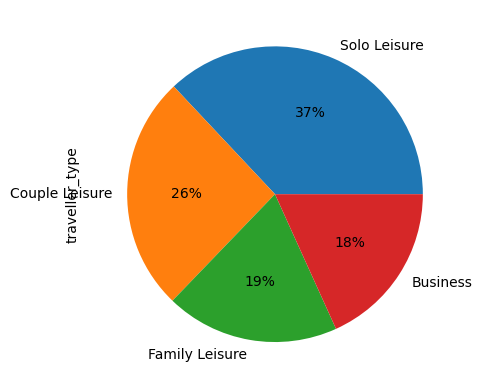

In [62]:
# Chart - 5 visualization code
df.traveller_type.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

I chose pie chart because it will help us clearly notice the distribution of percentage over different category.

##### 2. What is/are the insight(s) found from the chart?

Surprizingly the Solo Leisure is higher in the traveller type category. Second highest is couple_leisure.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

I didn't get any business insights in this above graph.

#### Chart - 6

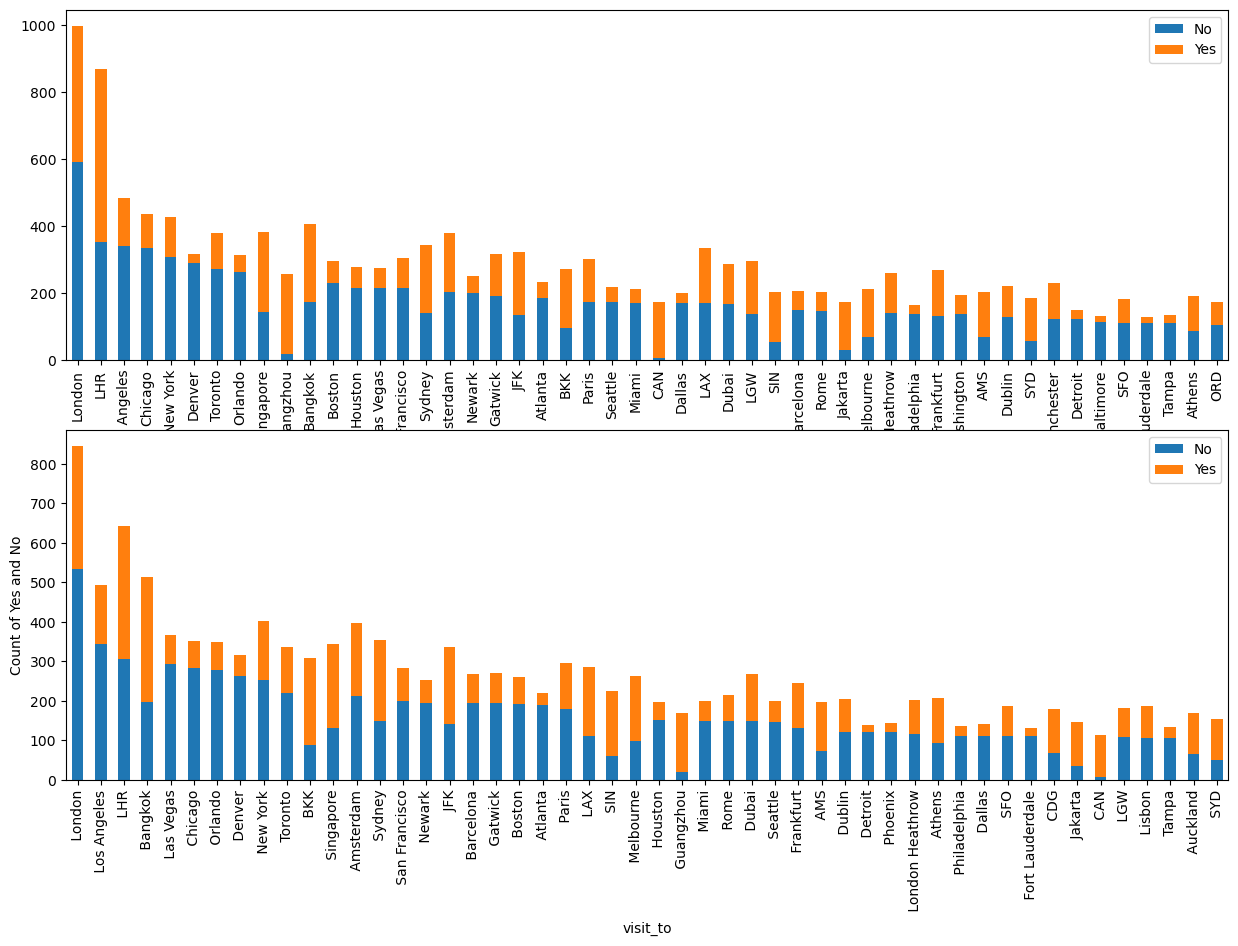

In [63]:
# Chart - 6 visualization code

fig, (ax1, ax2) = plt.subplots(2)
visited_from = df.groupby(['visit_from','recommended']).agg({'recommended': 'count'}).rename(columns = {'recommended': 'count'}).sort_values(by='count',ascending=False).unstack()
visited_from[:50].plot(kind = 'bar',stacked = True,figsize = (15,10),ax=ax1)
ax1.legend(['No','Yes'])


visited_to = df.groupby(['visit_to','recommended']).agg({'recommended': 'count'}).rename(columns = {'recommended': 'count'}).sort_values(by='count',ascending=False).unstack()
visited_to[:50].plot(kind = 'bar',stacked = True,figsize = (15,10),ax=ax2)
ax2.legend(['No','Yes'])
plt.ylabel('Count of Yes and No')
plt.show()




##### 1. Why did you pick the specific chart?

Bar Chart will help us to get the insights better if it is a categoryical one side and numerical(especially count) on other side. So I chose this chart.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we could see that, from these places people travelled more. And top 50 places in the visited from and visited to are almost same, this is saying most people travelled may be for touring,business purpose.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From these we could see that, who travelled from and to London had reviewed more times and seems like majority of people are not satisfied with the services.

#### Chart - 7

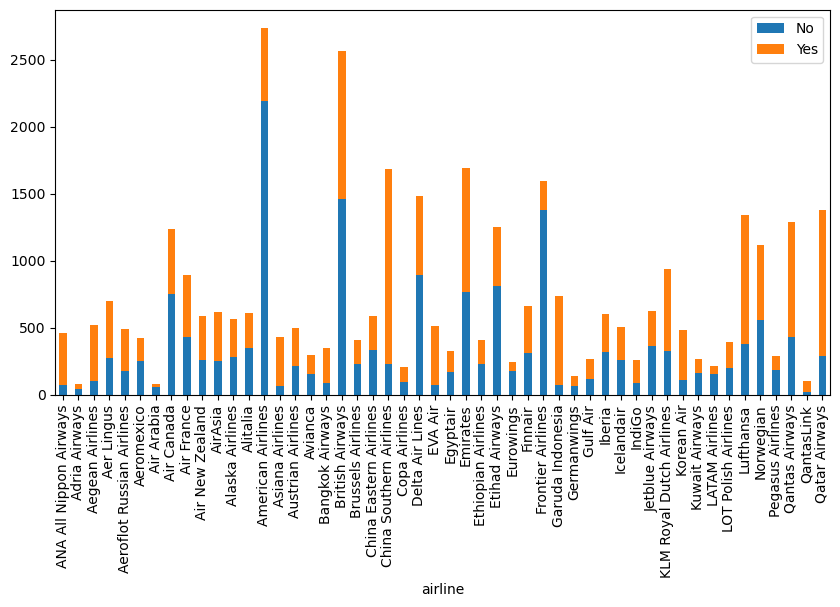

In [64]:
# Chart - 7 visualization code
airline_count = df.groupby(['airline','recommended']).agg({'recommended': 'count'}).rename(columns = {'recommended': 'count'}).sort_values(by='count',ascending=False).unstack()
airline_count[:50].plot(kind = 'bar',stacked = True,figsize = (10,5))
plt.legend(['No','Yes'])
plt.show()


##### 1. Why did you pick the specific chart?

I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is airline and on y-axis it is count of yes and no as numberical data.
The above chart will help us to compare failure and success over year.

##### 2. What is/are the insight(s) found from the chart?

Any airlines are doing good actually, but the popular airlines which we seen before like American Airlines,British Airways are not doing good. Their passengers are mostly not recommending the airlines.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The popular airlines should take an immediate action for this, otherwise they may loose with the competitors who is giving value for money.

#### Chart - 8

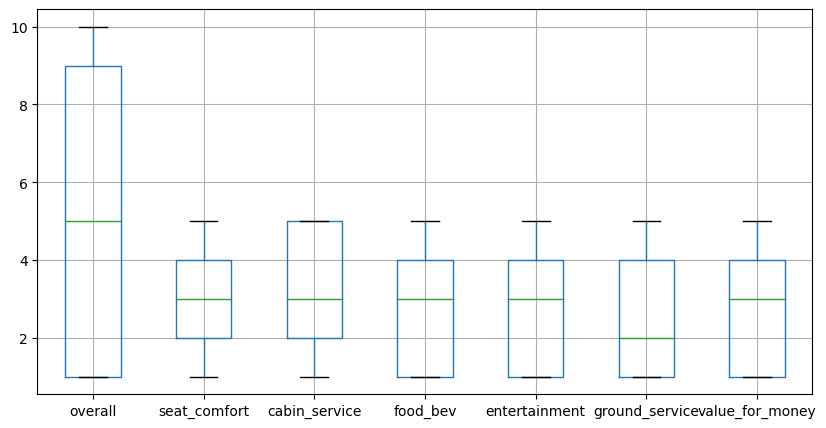

In [65]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
df.select_dtypes(include = np.number).boxplot()
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot really helpful to view the distribution of variables along with its ranges and get some insights about outliers. 

##### 2. What is/are the insight(s) found from the chart?

From the above we can see that all the numberical data except overall ranges from 1 to 5, and there is no outlier in these columns. This means, is columns doesn't need any preprocessing may be only handling outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It doesn't have any businees impact directly, I plotted this for my own interest to know.

#### Chart - 9

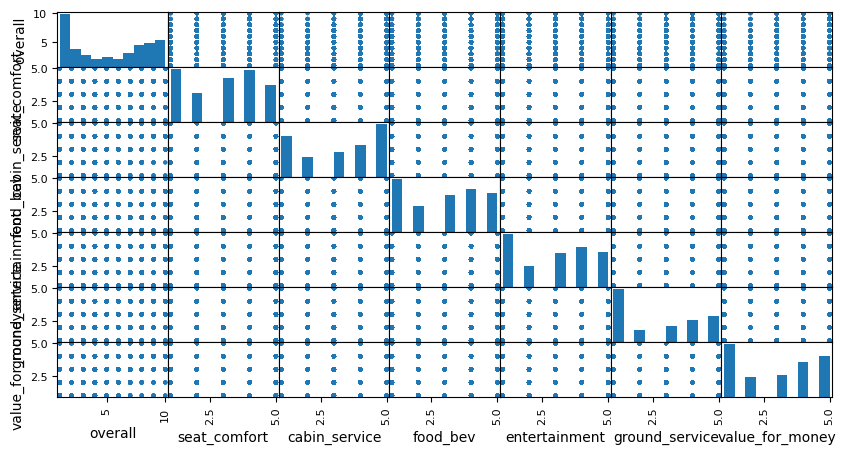

In [66]:
# Chart - 9 visualization code

pd.plotting.scatter_matrix(df.select_dtypes(include = np.number),figsize=(10,5))
plt.show()


##### 1. Why did you pick the specific chart?

This is just the Scatter plot for every column combination.I chose this graph because to see how the variable corelated both linearly and non-linearly with other variable.


##### 2. What is/are the insight(s) found from the chart?

From this graph, we can see that all ratings are kind of whole numbers not decimal.It is oridinal categorical data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The most rated in all the category is 1 except cabin_service. I think most passengers are satisfied with the cabin service. Majority passegers are not satisfied with the others.So concentrating and receiving feedback from the passengers, may give some idea of how to improve business.

#### Chart - 10

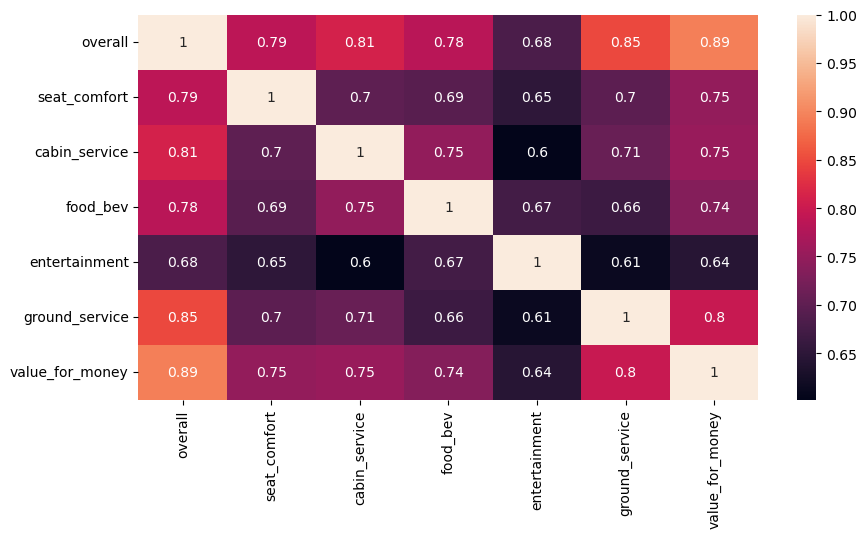

In [67]:
# Chart - 10 visualization code
#plotting a correlation heatmap for all variables
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.select_dtypes(include = np.number).corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Heat map helps us to view the overall linear correlation for all variable combination with specific value.

##### 2. What is/are the insight(s) found from the chart?

As we expected the overall feature have hight correlation with all the other variable as it the representation of all rating features. Highest we have value for money.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Concentrating each and every rating featuring is more important to improve business. Which will say about how to improve our business.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The overall and value_for_money are giving same information
Alternate Hypothesis : The overall and value_for_money are not same


#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
import numpy as np

value_for_money =df[df['value_for_money'].notna()].value_for_money
overall = df[df['overall'].notna()].overall

val_for_mean = np.mean(value_for_money)
overall_mean = np.mean(overall)

print("value_for_money mean value:",val_for_mean)
print("overall mean value:",overall_mean)

value_for_mean_std = np.std(value_for_money)
overall_std = np.std(overall)

print("week1 std value:",value_for_mean_std)
print("week2 std value:",overall_std)

ttest,pval = ttest_ind(value_for_money,overall)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

value_for_money mean value: 2.956480519243742
overall mean value: 5.182397146860272
week1 std value: 1.5900536747567833
week2 std value: 3.490953715969588
p-value 0.0
we reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The overall and ground_service are giving same information
Alternate Hypothesis : The overall and ground_service are not same


#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
import numpy as np

ground_service =df[df['value_for_money'].notna()].ground_service
overall = df[df['overall'].notna()].overall

grd_service_for_mean = np.mean(ground_service)
overall_mean = np.mean(overall)

print("ground_service mean value:",grd_service_for_mean)
print("overall mean value:",overall_mean)

value_for_mean_std = np.std(ground_service)
overall_std = np.std(overall)

print("ground_service std value:",value_for_mean_std)
print("overall std value:",overall_std)

ttest,pval = ttest_ind(ground_service,overall)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


ground_service mean value: 2.668486806369536
overall mean value: 5.182397146860272
ground_service std value: 1.615873094112003
overall std value: 3.490953715969588
p-value nan
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [71]:
#copying df
df_copy = df.copy(deep=True)
SEED = 42

In [72]:
#removing unwanted columns and rows which has more Nan Values
class RemoveUnwantedColsAndRows(BaseEstimator,TransformerMixin):
    def __init__(self,unwanted_columns,non_nan_row_threshold):
        self.unwanted_columns = unwanted_columns
        self.non_nan_row_threshold = non_nan_row_threshold
        return None

    def fit(self,X):
        return self

    def transform(self,X):
        dataFrame = X.copy()
        #removing unwanted features
        dataFrame.drop(self.unwanted_columns,axis=1,inplace = True)
        #removing rows which has Nan more than given threshold
        dataFrame.dropna(thresh = self.non_nan_row_threshold,inplace = True)
        #filtering rows which has target variable null
        return dataFrame[dataFrame['recommended'].notna()].reset_index(drop = True)


In [73]:
#Handling Missing values
class HandlingRatingMissingValues(BaseEstimator,TransformerMixin):
    def __init__(self,estimator = 'mean'):
        self.estimator = estimator
        return None
    
    def fit(self,X):
        self.estimated_df = round(X.groupby('airline')
                        .agg({'seat_comfort':self.estimator,'cabin_service':self.estimator,
                              'food_bev':self.estimator,'entertainment': self.estimator,
                              'ground_service':self.estimator,'value_for_money':self.estimator,'overall':self.estimator,}))
        
        return self
    

    def transform(self,X):
        X = X.copy()
        for idx in range(X.shape[0]):
            if X.loc[idx,['seat_comfort','cabin_service','food_bev','entertainment',
                           'ground_service','value_for_money','overall']].isna().sum() > 0 :
                    airline_mean_dict = self.estimated_df.loc[X.loc[idx,'airline'],:].to_dict()
                    X.loc[idx,:] = X.loc[idx,:].fillna(value = airline_mean_dict)
        X.dropna(inplace = True)
        X.reset_index(drop = True,inplace = True)
        return X
        

        

#### What all missing value imputation techniques have you used and why did you use those techniques?

I imputed missing values using the mean value of that particular airline company. I calculated the mean value of each numerical feature by grouping the airline feature and imputed the missing values using that mean

### 2. Handling Outliers

In [74]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we seen in the Visualization part, our data does not having any outliers in it. So I am skipping this part.

### 3. Categorical Encoding

In [75]:
# OneHotEncoding our categroical data 

class CustomOneHotEncoder(BaseEstimator,TransformerMixin):
    def __init__(self,column_names):
        self.column_names = column_names
        return None

    def fit(self,df):
        #making column transformer and fitting only the given columns
        self.one_hot_transformer = make_column_transformer((OneHotEncoder(sparse= False,dtype=np.int64),self.column_names)
                                                           ,remainder='passthrough')
        self.one_hot_transformer.fit(df)
        return self
    
    def transform(self,df):
        df = df.copy()
        ohe_transformed = self.one_hot_transformer.transform(df)
        transformed_df = pd.DataFrame(ohe_transformed, columns=self.one_hot_transformer.get_feature_names())
        return transformed_df


In [76]:
#mapping target variable 1 and 0 for yes and no respectively
class TargetEncoding(BaseEstimator,TransformerMixin):
    def __init__(self,target_variable,target_map):
        self.target_variable = target_variable
        self.target_map = target_map
        return None
    
    def fit(self,df):
        return self

    def transform(self,df):
        df = df.copy()
        df[self.target_variable] = df[self.target_variable].map(self.target_map).astype('int32')
        return df
        

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have some categorical features 'airline' and 'cabin'. Both are Nominal variable, So I chose OneHotEncoding for making this features into numerical type.As our 'airline' as 75 unique values, it will produce 75 new features for that airline and 4 for 'cabin' features.

And finally we have target variable as "yes" and "no", which has to be changed to numerical data type in order to use it for training ML model. So I just map this feature as 1 for yes and 0 for no.


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [77]:
#decoding non-utf-8 characters
def remove_non_utf8_words(df,features_names):
    df = df.copy()
    for feature in features_names:
        df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
        df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
    return df

In [78]:
# Expand Contraction
def expand_contractions(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
        df[feature] = df[feature].apply(lambda x : contractions.fix(x))
    return df



#### 2. Lower Casing

In [79]:
# Lower Casing
def change_to_lower_case(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : x.lower())
    return df

#### 3. Removing Punctuations

In [80]:
# Remove Punctuations
def remove_punctuations(df,features_columns):
    df = df.copy()
    punctuations = string.punctuation
    for feature in features_columns:
        df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
    return df

#### 4. Removing URLs & Removing words and digits contain digits.

In [81]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
    return df

def remove_words_with_digits(df, feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
    return df

#### 5. Removing Stopwords & Removing White spaces

In [82]:
# Remove Stopwords
def remove_stopwords(df,features_names):
    df = df.copy()
    eng_stopwords = set(stopwords.words('english'))
    for feature in features_names:
        df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
    return df

#### 6. Tokenization and Text Normalization

In [83]:
# Tokenization
def tokenize_and_normalization(df,feature_names):
    lemmatizer=WordNetLemmatizer()
    for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
    return df

##### Which text normalization technique have you used and why?

I using Lemmatization normalization because it will do better than stemming. In stemming, there is chance that it will change the word completely. But in case of Lemmatization, it is not the case, it will try to maintain the original context of the sentence.

#### 7. Text Vectorization

In [84]:
class CustomTextDataPreprocessing(BaseEstimator,TransformerMixin):
    
    def __init__(self,feature_names):
        self.feature_names = feature_names
        return None
    
    #decoding non-utf-8 characters
    def remove_non_utf8_words(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
            df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
        return df
    
    # Expand Contraction
    def expand_contractions(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
            df[feature] = df[feature].apply(lambda x : contractions.fix(x))
        return df
    
        # Lower Casing
    def change_to_lower_case(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.lower())
        return df

        # Remove Punctuations
    def remove_punctuations(self,df,features_names):
        df = df.copy()
        punctuations = string.punctuation
        for feature in features_names:
            df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
        return df
    
    # Remove URLs & Remove words and digits contain digits
    def remove_urls(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
        return df

    def remove_words_with_digits(self,df, feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
        return df
    
    # Remove Stopwords
    def remove_stopwords(self,df,feature_names):
        df = df.copy()
        eng_stopwords = set(stopwords.words('english'))
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
        return df

    # Tokenization
    def tokenize_and_normalization(self,df,feature_names):
        lemmatizer=WordNetLemmatizer()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
        return df
     

    def fit(self,df):
        return self
    
    def transform(self,df):
        df =df.copy()
        #removing non utf8 words
        df = self.remove_non_utf8_words(df,self.feature_names)
        #expanding contractions 
        df = self.expand_contractions(df,self.feature_names)
        #changing all to lower case
        df = self.change_to_lower_case(df,self.feature_names)
        #remvoing punctuations
        df = self.remove_punctuations(df,self.feature_names)
        #removing urls
        df = self.remove_urls(df,self.feature_names)
        #removing words with digits
        df = self.remove_words_with_digits(df,self.feature_names)
        #remove stopwords
        df = self.remove_stopwords(df,self.feature_names)
        #remove tokenize and normalization
        df = self.tokenize_and_normalization(df,self.feature_names)
        

        return df
        

In [85]:
# Vectorizing Text
class CustomTfidVectorizer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_name,max_features = None):
        self.max_features = max_features
        self.feature_name = feature_name
        return None
    
    def fit(self,df):
        self.TfidVectorizer = TfidfVectorizer(max_features= self.max_features)
        self.TfidVectorizer.fit(df[self.feature_name])
        return self
    
    def transform(self,df):
        df = df.copy()
        vectors = self.TfidVectorizer.transform(df[self.feature_name]).toarray()
        df[self.TfidVectorizer.get_feature_names()] = vectors
        df.drop(self.feature_name,axis = 1,inplace = True)
        return df

##### Which text vectorization technique have you used and why?

Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.Not like Bag of words and Count Vector technique which treats all words equally,TF-IDF can distinguish very common words or rare words

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features
class CreateFeaturesFromDate(BaseEstimator,TransformerMixin):
    def __init__(self,date_features):
        self.date_features = date_features
        return None
    
    def fit(self,df):
        return self
    
    def transform(self,df):
        df = df.copy()
        for date_col in self.date_features:
            df[f'{date_col}_day'] = df[date_col].dt.day
            df[f'{date_col}_month'] = df[date_col].dt.month
            #df[f'{date_col}_year'] = df[date_col].dt.year
            df.drop(date_col,axis=1,inplace=True)
        return df


#### 2. Feature Selection

In [87]:
# Select your features wisely to avoid overfitting

class RemoveCorrelatedFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,features_to_check = [],correlation_threshold = 0.85):
        self.features_to_check = features_to_check
        self.correlation_threshold = correlation_threshold
        return None
        
    def fit(self,X):
        '''
        Description : Remove correlated features with less correlation with target
        X : Dataframe with only features
        y : Target Series
        '''
        if len(self.features_to_check) == 0:
            col_corr = set()
            corr_matrix = X.corr()

        else:
            col_corr = set()
            corr_matrix = X[self.features_to_check].corr()
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.correlation_threshold: 
                    corr_i, _ = pearsonr(X.recommended.map({'yes':1,'no':0}), X.loc[:,corr_matrix.columns[i]])
                    corr_j, _ = pearsonr(X.recommended.map({'yes':1,'no':0}), X.loc[:,corr_matrix.columns[j]])
                    if abs(corr_i) < abs(corr_j):
                        colname = corr_matrix.columns[i]  
                        col_corr.add(colname)
                    else:
                        colname = corr_matrix.columns[j]  
                        col_corr.add(colname)

        self.correlated_columns = col_corr
        self.final_column_names = set(X.columns) - self.correlated_columns
        return self
    
    def transform(self, X,y = None):
         X = X.copy()
         '''
         Parameter : The Dataframe you want to remove correlated features
         Returns : Dataframe by removing the correlated features.
         '''
         return X.drop(self.correlated_columns,axis=1)


##### What all feature selection methods have you used  and why?

I to remove multi collinearity, I iterated over every column and removed the column with is high correlation with other features and also doesn't have impact to target variable.

##### Which all features you found important and why?

Here in this data I found 'aircraft','visit_to','visit_from','date_flown','traveller_type','author' these features is not important, because some has more null values and some not add any value in predicting the target variable.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [88]:
#Custom Transformer for applying log for the selective features.
class ApplyTransformation(BaseEstimator,TransformerMixin):
     def __init__(self,feature_names):
          self.feature_names = feature_names
          return None
     
     def fit(self,X,y = None):
          return self
     
     def transform(self,X,y = None):
          X[self.feature_names] = np.log10(X[self.feature_names])
          return X

### 7. Data Scaling

In [89]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [90]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

#### Split your data to train and test. Choose Splitting ratio wisely

In [91]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=SEED)
df = df[~df['recommended'].isna()].reset_index(drop=True)
for train_index, test_index in split.split(df,df['recommended']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

del df

In [92]:
#printing target variable distribution for test
test_set['recommended'].value_counts(normalize=True)*100

no     52.067686
yes    47.932314
Name: recommended, dtype: float64

In [93]:
#printing target variable distribution for train
train_set['recommended'].value_counts(normalize=True)*100

no     52.062171
yes    47.937829
Name: recommended, dtype: float64

##### What data splitting ratio have you used and why? 

I chose 0.2 as test data ratio. Totally my data has around 55k data points, so I thought 10K data points would be enough for test set and rest all are for train set. So splitting data around 0.2 will give me around 11K so I chose 0.2 ratio.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [94]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

It is not imbalanced dataset. Has almost same number of positive and negative examples.

## ***7. ML Model Implementation***

In [95]:
numerical_pipeline = Pipeline([
    ('remove_unwanted_col_rows',RemoveUnwantedColsAndRows(unwanted_columns=['aircraft','visit_to','visit_from',
                                                                            'date_flown','traveller_type','author'],non_nan_row_threshold = 7)),

    ('handling_ratings_missing_val',HandlingRatingMissingValues(estimator='mean')),

    ('create_date_features',CreateFeaturesFromDate(date_features=['review_date'])),

    ('remove_corr_features',RemoveCorrelatedFeatures(correlation_threshold=0.9,features_to_check= ['overall','value_for_money','ground_service','entertainment',
                                                               'food_bev','cabin_service','seat_comfort','review_date_day','review_date_month'])),

    ('log_transformation',ApplyTransformation(feature_names = ['overall','value_for_money','ground_service','entertainment',
                                                               'food_bev','cabin_service','seat_comfort','review_date_day','review_date_month']))
])

categorical_pipeline = Pipeline([
    ('one_hot_encoding',CustomOneHotEncoder(column_names=['airline','cabin'])),

    ('target_encoder',TargetEncoding(target_variable='recommended',target_map= {'no':0,'yes':1}))
    
])

text_feature_pipeline = Pipeline([
    ('text_preprocessing',CustomTextDataPreprocessing(feature_names=['customer_review'])),
    ('vectorization',CustomTfidVectorizer(feature_name='customer_review',max_features=400))
])


In [96]:
#final preprocessing pipeline

final_pipeline = Pipeline([
    ('numerical_pipeline',numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
    ('text_preprocess_pipeline',text_feature_pipeline)
])



In [97]:
train_set = final_pipeline.fit_transform(train_set).astype('float')
test_set = final_pipeline.transform(test_set).astype('float')

In [98]:
y_train = train_set.recommended
x_train = train_set.drop('recommended',axis=1)
y_test = test_set.recommended
x_test = test_set.drop('recommended',axis=1)

In [99]:
del train_set,test_set

In [100]:
#printing the shapes of our data
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

X_train :  (43117, 486)
y_train :  (43117,)
X_test :  (10780, 486)
y_test :  (10780,)


### ML Model - 1

In [66]:
# ML Model - 1 Implementation
svm = SVC(kernel = 'rbf')

# Fit and predict the algorithm 
svm.fit(x_train,y_train)

train_prediction = svm.predict(x_train)
test_prediction = svm.predict(x_test)

#Calculating accuracy score
train_acc = accuracy_score(y_train,train_prediction)
test_acc = accuracy_score(y_test,test_prediction)



In [67]:
#printing accuracy Score
print('SVM TRAIN ACCURACY-----',train_acc)
print('SVM TEST ACCURACY-----',test_acc)

SVM TRAIN ACCURACY----- 0.9593431825034209
SVM TEST ACCURACY----- 0.9483302411873841


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

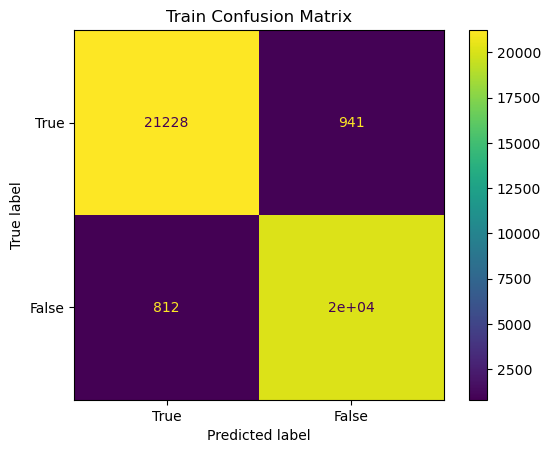

In [81]:
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_train,train_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()

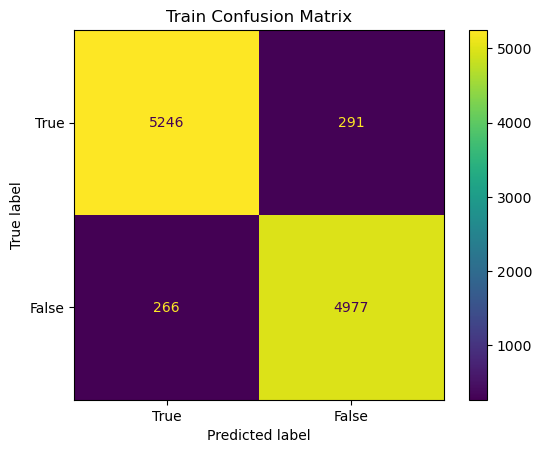

In [83]:
# Visualizing evaluation Metric Score chart
test_confusion_matrix = confusion_matrix(y_test,test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
svr_grid = SVC()


svm_hyper_param = [{
    'kernel':['poly','rbf'],
    'degree':[4,5],
    'C': [1,2]    
}]

grid_search = GridSearchCV(svr_grid, svm_hyper_param, cv=4,
                               scoring='accuracy')

# Fit the Algorithm 
grid_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", grid_search.best_params_)
print("------ BEST ESTIMATOR -----" , grid_search.best_estimator_)

------ BEST PARAMETER ----- {'C': 2, 'degree': 4, 'kernel': 'rbf'}
------ BEST ESTIMATOR ----- SVC(C=2, degree=4)


In [103]:
#Initializing best features
svc_grid = grid_search.best_estimator_

#fitting whole x_train
svc_grid.fit(x_train,y_train)

train_prediction = svc_grid.predict(x_train)
test_prediction = svc_grid.predict(x_test)

#Calculating acc score
grid_train_acc = accuracy_score(y_train,train_prediction)
grid_test_acc = accuracy_score(y_test,test_prediction)

In [104]:
#printing RMSE
print(grid_train_acc)
print(grid_test_acc)

0.9660922605932695
0.9476808905380334


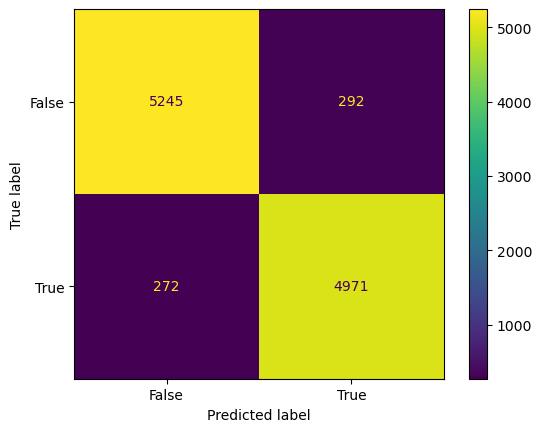

In [105]:
confusion_matrix = confusion_matrix(y_test, test_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I am choosing the Grid Search optimization technique. Because first thing is,the most of the hyperparameter which I trying to modify in SVM are just Integers,so working with grid search cv gives more comfortable, where RandomizedSearch may pick any natural number between those Integer. The Second reason is I don't have much computation power and Colab too not much quick. Grid Search CV helps to find the best paramter range, so If I have more computation power I will use Random Search with the range I found using Grid that sure help me to find the best paramter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
grid_confusion_matrix = confusion_matrix(y_test,grid_test_acc)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()

The tuned parameter performed same as SVC with default paramter.No Changes in evaluation metric result.

### ML Model - 2

In [85]:
random_forest = RandomForestClassifier(random_state= SEED)

# Fit and predict the algorithm 
random_forest.fit(x_train,y_train)

forest_train_prediction = random_forest.predict(x_train)
forest_test_prediction = random_forest.predict(x_test)

#calculating RMSE score
forest_train_accuracy = accuracy_score(y_train,forest_train_prediction)
forest_test_accuracy = accuracy_score(y_test,forest_test_prediction)

In [86]:
#printing scores of train and test
print("FOREST TRAIN ACCURACY---: ",forest_train_accuracy)
print("FOREST TEST ACCURACY---: ",forest_test_accuracy)

FOREST TRAIN ACCURACY---:  1.0
FOREST TEST ACCURACY---:  0.9461966604823747


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

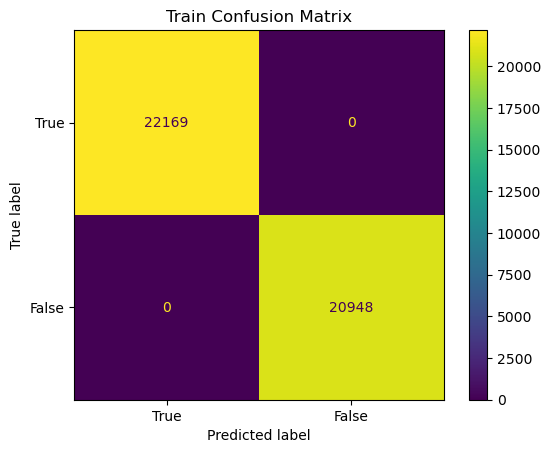

In [87]:
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_train,forest_train_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()



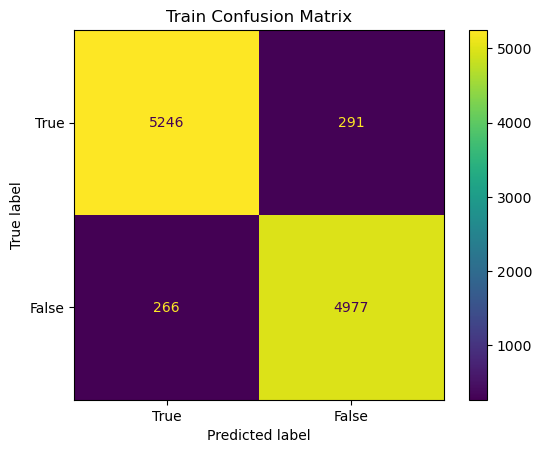

In [89]:
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_test,test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
forest_grid = RandomForestClassifier()

forest_hyper_param = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)],
    'max_depth' : [int(x) for x in np.linspace(3, 80, num = 11)],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap': [True,False]
}

forest_random_search = RandomizedSearchCV(estimator = forest_grid , param_distributions = forest_hyper_param, n_iter = 20, cv = 4, verbose=1, random_state=SEED , n_jobs = -1)

# Fit the Algorithm 
forest_random_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", forest_random_search.best_params_)
print("------ BEST ESTIMATOR -----" , forest_random_search.best_estimator_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
------ BEST PARAMETER ----- {'n_estimators': 188, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 41, 'bootstrap': True}
------ BEST ESTIMATOR ----- RandomForestClassifier(max_depth=41, min_samples_split=3, n_estimators=188)


In [101]:
#Initializing with the best parameters
random_forst = RandomForestClassifier(min_samples_leaf = 1 ,bootstrap=True , max_depth=41, min_samples_split=3, n_estimators=120)

random_forst.fit(x_train,y_train)

# Predict on the model
for_train_prediction = random_forst.predict(x_train)
for_test_prediction = random_forst.predict(x_test)

#calculating RMSE score
train_acc = accuracy_score(y_train,for_train_prediction)
test_acc = accuracy_score(y_test,for_test_prediction)


In [102]:
#printing accuracy score
print("Train acc: ",train_acc)
print("Test acc: ",test_acc)

Train acc:  0.9992810260454114
Test acc:  0.9462894248608534


##### Which hyperparameter optimization technique have you used and why?

I chose RandomizedSearch Optimization technique because I don't know the exact range for some parameters for RandomForestRegressor, so I could not GridSearch because it will try all the combination which is actually good but I don't have much computer power to train such number of times. Where in Randomized search, I can try very wide range of parameters which will try random variables for given number of iteration and give the result which is best among those iteration. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

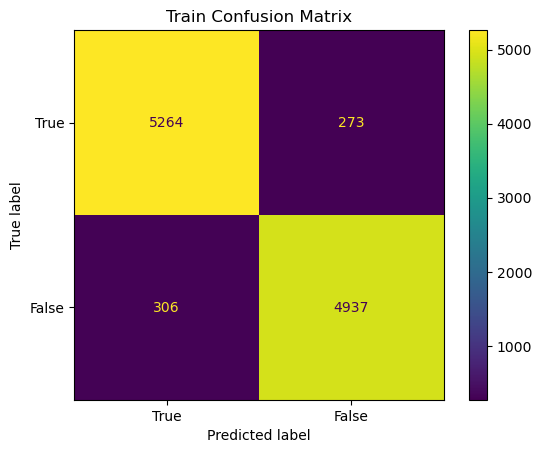

In [103]:
# Visualizing evaluation Metric Score chart
test_confusion_matrix = confusion_matrix(y_test,for_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()



The results are much similar to the XGBoost and the tuned parameter performed is same as default paramter.Not much Changes in evaluation metric result.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Choosing Accuracy, is correct and good for this particular dataset.As its result is easy to interpret and our dataset labels are perfectly skewed.

### ML Model - 3

In [245]:
# ML Model - 3 Implementation
xg = XGBClassifier()

# Fit the Algorithm
xg.fit(x_train,y_train)

# Predict on the model
xg_train_prediction = xg.predict(x_train)
xg_test_prediction = xg.predict(x_test)

#calculating RMSE Score
xg_train_acc = accuracy_score(y_train,forest_train_prediction)
xg_test_acc = accuracy_score(y_test,forest_test_prediction)



In [246]:
#printing acc score
print("Train acc: ",xg_train_acc)
print("Test acc: ",xg_test_acc)

Train acc:  1.0
Test acc:  0.9461966604823747


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

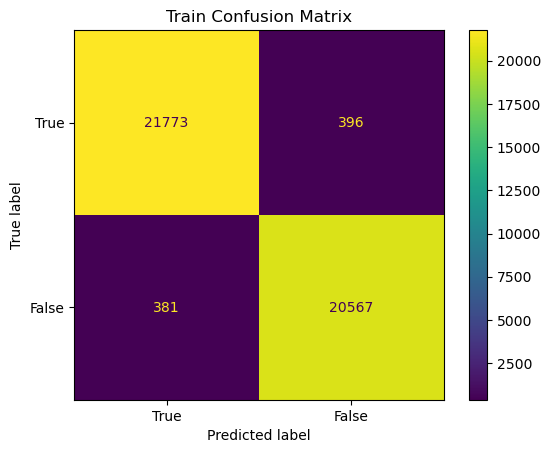

In [247]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_train,xg_train_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()



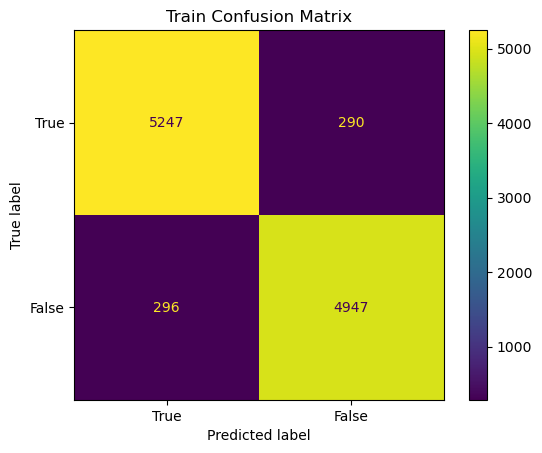

In [248]:
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_test,xg_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb_grid = XGBClassifier()

xgb_params = {
 'max_depth': [3,5,8,9],
 'learning_rate': [0.1,0.01,0.15],
  'n_estimators': [60,80,100,140], 
}

xgb_grid_search = GridSearchCV(xgb_grid, xgb_params, cv=4,scoring='accuracy')

xgb_grid_search.fit(x_train, y_train)
print("------ BEST PARAMETER -----", xgb_grid_search.best_params_)
print("------ BEST ESTIMATOR -----" , xgb_grid_search.best_estimator_)

------ BEST PARAMETER ----- {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 140}
------ BEST ESTIMATOR ----- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [134]:
# Fit the Algorithm
xgb_grid = xgb_grid_search.best_estimator_

xgb_grid.fit(x_train,y_train)

# Predict on the model
xgb_train_prediction = xgb_grid.predict(x_train)
xgb_test_prediction = xgb_grid.predict(x_test)



#calculating RMSE score
grid_train_acc = accuracy_score(y_train,xgb_train_prediction)
grid_test_rmse = accuracy_score(y_test,xgb_test_prediction)


In [136]:
print(grid_train_acc)
print(grid_test_rmse)

0.9901430990096713
0.9446196660482374


##### Which hyperparameter optimization technique have you used and why?

I used GridSearch, because not like RandomForest hyper parameters, I know the range of values need to give for hyper parameter, so I am ready to train model for all combination of parameters to find the best. And also, not like RandomForest taking more time for training compare to the XGBoost, so I could offer the computationally for XGBoost. These are the reason behind choosing GridSearch

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

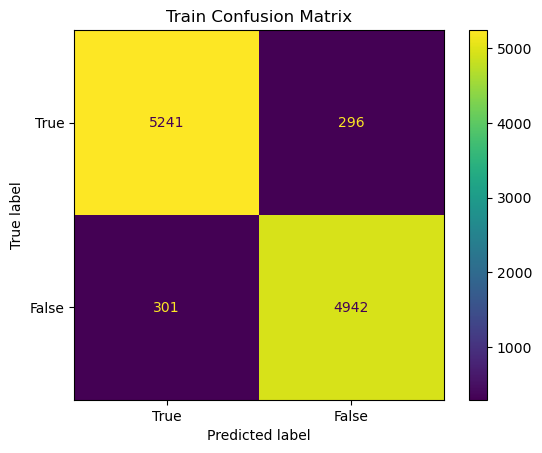

In [ ]:
# Visualizing evaluation Metric Score chart
train_confusion_matrix = confusion_matrix(y_test,xgb_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.title("Train Confusion Matrix")
plt.show()

The results are much similar to the RandomForest, the tuned parameter performed same as default paramter.No Changes in evaluation metric result.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I am choosing accuracy, because it is pretty straight forward as this shows the percentage of correct predictions.The only drawback is we should not use accuracy for skewed dataset, that not the case for our dataset.As our dataset labels are almost same number of data for both the labels.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I am choosing SVM with default parameter. But it is very close between random forest and xgboost both performing very same in the new unseen data.Both of the model is slightly overfitted. Even after the hyper parameter tuning we could able to see any changes in the result.So because of model interpretability as an advantage, I am choosing that.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [140]:
for imp,var in sorted(zip(grid_search.best_estimator_.feature_importances_,x_train.columns),reverse = True):
    print(var,'---',imp)

value_for_money --- 0.25953984
cabin_service --- 0.018746505
ground_service --- 0.006383889
seat_comfort --- 0.0047246246
onehotencoder__x0_SAS Scandinavian --- 0.004004796
efficient --- 0.0036462247
told --- 0.0036349597
onehotencoder__x0_Wizz Air --- 0.003424354
food_bev --- 0.003361725
onehotencoder__x0_Lufthansa --- 0.003265968
avoid --- 0.0032092656
worst --- 0.003200024
never --- 0.0031939703
friendly --- 0.003122339
short --- 0.0030466996
onehotencoder__x0_Vueling Airlines --- 0.00302114
disappointed --- 0.002918619
bit --- 0.0029066792
customer --- 0.0028801917
overall --- 0.002875463
security --- 0.0028505814
another --- 0.0027686094
quick --- 0.0027113247
nice --- 0.0027090816
excellent --- 0.0027072665
smooth --- 0.002705234
sit --- 0.002701133
call --- 0.0026943348
etihad --- 0.002692655
easy --- 0.002672468
good --- 0.002626853
cancelled --- 0.0025541265
professional --- 0.0025371779
onehotencoder__x0_Alaska Airlines --- 0.0025308677
hotel --- 0.0025076736
fa --- 0.0024917

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

filename = 'finalized_model.sav'
joblib.dump(random_forst, filename)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

loaded_model = joblib.load(filename)
result = loaded_model.predict(x_test, y_test)
print(result)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We started with the basic understanding of the dataset and did some EDA to find more information and characteristics of dataset.Then we started preprocessing depend upon our problems and then did featuring Engineering. And we came to the heart of the our work which is model building. We builded three different models svm,random forest and xgboost initally with the default parameters and then used different techiques to find the optimized and better hyperparameters for each model individually. Then we used accuracy to find the best among those models. Finally, we chose RandomForest: for its good performance for our dataset. Then we found feature importance to know which feature played major role in prediction and finally we saved the model's learned parameter using joblib library.  

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***